<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.638075,80.583983,-0.001046,111.221012,111.219900,0.001112
1,0.0,1.0,49.464643,81.218006,0.007051,140.689700,140.682142,0.007558
2,0.0,2.0,27.941076,49.826339,-0.017107,87.750308,87.766768,-0.016460
3,0.0,3.0,36.338043,97.409843,0.003830,143.751716,143.746045,0.005671
4,0.0,4.0,61.685403,24.512411,0.011301,96.209115,96.200020,0.009095
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.658772,27.395887,-0.037528,135.017131,135.050030,-0.032899
249996,999.0,246.0,50.068347,79.662204,0.003802,139.734353,139.733938,0.000415
249997,999.0,247.0,83.921402,49.223624,0.010156,143.155182,143.143401,0.011780
249998,999.0,248.0,29.384248,51.346888,0.052589,90.783725,90.732775,0.050950


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.638075,80.583983,-0.001046,111.221012,111.219900,0.001112
1,0.0,1.0,49.464643,81.218006,0.007051,140.689700,140.682142,0.007558
2,0.0,2.0,27.941076,49.826339,-0.017107,87.750308,87.766768,-0.016460
3,0.0,3.0,36.338043,97.409843,0.003830,143.751716,143.746045,0.005671
4,0.0,4.0,61.685403,24.512411,0.011301,96.209115,96.200020,0.009095
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.658772,27.395887,-0.037528,135.017131,135.050030,-0.032899
249996,999.0,246.0,50.068347,79.662204,0.003802,139.734353,139.733938,0.000415
249997,999.0,247.0,83.921402,49.223624,0.010156,143.155182,143.143401,0.011780
249998,999.0,248.0,29.384248,51.346888,0.052589,90.783725,90.732775,0.050950


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.638075  80.583983 -0.001046  111.221012  111.219900  0.001112
      1.0    49.464643  81.218006  0.007051  140.689700  140.682142  0.007558
      2.0    27.941076  49.826339 -0.017107   87.750308   87.766768 -0.016460
      3.0    36.338043  97.409843  0.003830  143.751716  143.746045  0.005671
      4.0    61.685403  24.512411  0.011301   96.209115   96.200020  0.009095
...                ...        ...       ...         ...         ...       ...
999.0 245.0  97.658772  27.395887 -0.037528  135.017131  135.050030 -0.032899
      246.0  50.068347  79.662204  0.003802  139.734353  139.733938  0.000415
      247.0  83.921402  49.223624  0.010156  143.155182  143.143401  0.011780
      248.0  29.384248  51.346888  0.052589   90.783725   90.732775  0.050950
      249.0  66.314293  57.175555 -0.009006  133.480842  133.490022 -0.009180

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.638075  80.583983 -0.001046  111.221012  111.219900  0.001112
      1.0    49.464643  81.218006  0.007051  140.689700  140.682142  0.007558
      2.0    27.941076  49.826339 -0.017107   87.750308   87.766768 -0.016460
      3.0    36.338043  97.409843  0.003830  143.751716  143.746045  0.005671
      4.0    61.685403  24.512411  0.011301   96.209115   96.200020  0.009095
...                ...        ...       ...         ...         ...       ...
999.0 245.0  97.658772  27.395887 -0.037528  135.017131  135.050030 -0.032899
      246.0  50.068347  79.662204  0.003802  139.734353  139.733938  0.000415
      247.0  83.921402  49.223624  0.010156  143.155182  143.143401  0.011780
      248.0  29.384248  51.346888  0.052589   90.783725   90.732775  0.050950
      249.0  66.314293  57.175555 -0.009006  133.480842  133.490022 -0.009180

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.638075,80.583983,-0.001046,111.221012,111.219900,0.001112
1,0.0,1.0,49.464643,81.218006,0.007051,140.689700,140.682142,0.007558
2,0.0,2.0,27.941076,49.826339,-0.017107,87.750308,87.766768,-0.016460
3,0.0,3.0,36.338043,97.409843,0.003830,143.751716,143.746045,0.005671
4,0.0,4.0,61.685403,24.512411,0.011301,96.209115,96.200020,0.009095
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.658772,27.395887,-0.037528,135.017131,135.050030,-0.032899
249996,999.0,246.0,50.068347,79.662204,0.003802,139.734353,139.733938,0.000415
249997,999.0,247.0,83.921402,49.223624,0.010156,143.155182,143.143401,0.011780
249998,999.0,248.0,29.384248,51.346888,0.052589,90.783725,90.732775,0.050950


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.638075  80.583983 -0.001046  111.221012  111.219900  0.001112
      1.0    49.464643  81.218006  0.007051  140.689700  140.682142  0.007558
      2.0    27.941076  49.826339 -0.017107   87.750308   87.766768 -0.016460
      3.0    36.338043  97.409843  0.003830  143.751716  143.746045  0.005671
      4.0    61.685403  24.512411  0.011301   96.209115   96.200020  0.009095
...                ...        ...       ...         ...         ...       ...
999.0 245.0  97.658772  27.395887 -0.037528  135.017131  135.050030 -0.032899
      246.0  50.068347  79.662204  0.003802  139.734353  139.733938  0.000415
      247.0  83.921402  49.223624  0.010156  143.155182  143.143401  0.011780
      248.0  29.384248  51.346888  0.052589   90.783725   90.732775  0.050950
      249.0  66.314293  57.175555 -0.009006  133.480842  133.490022 -0.009180

[250000 rows x 6 columns]

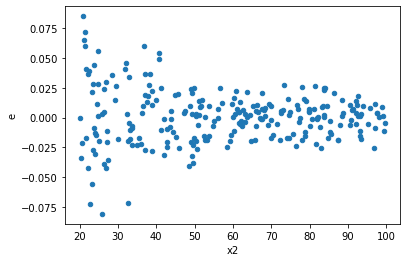

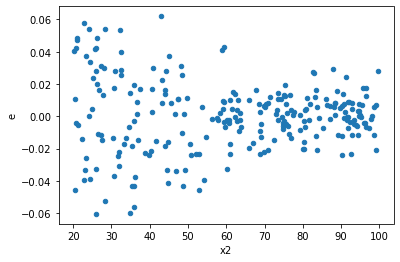

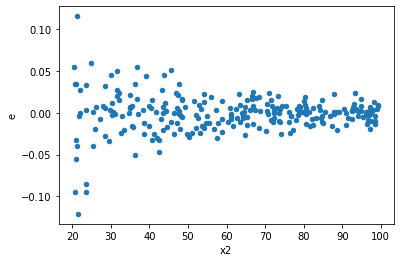

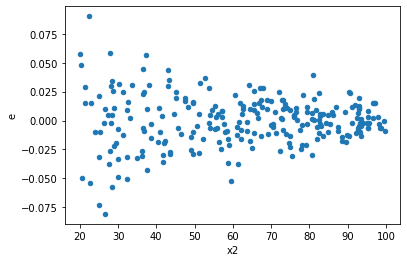

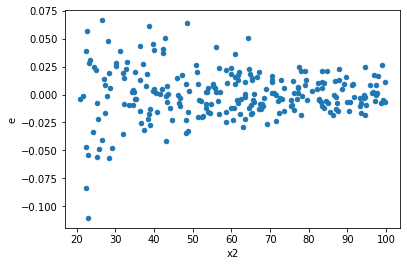

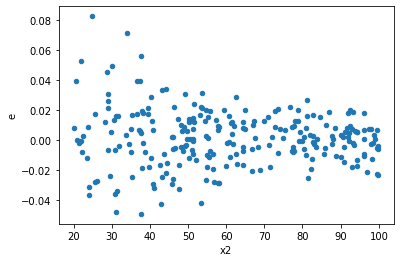

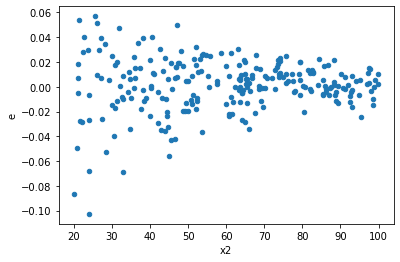

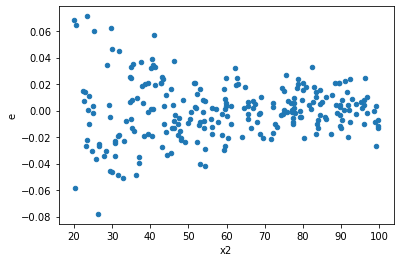

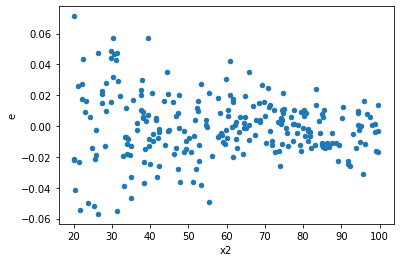

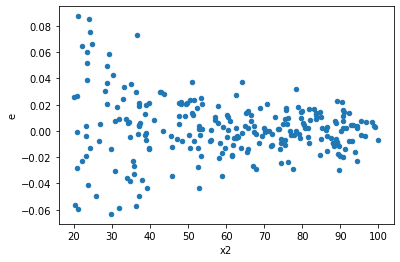

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.07538494920065927,0.019460579891805295,0.0007692341755169313,0.0001985773458347479,0.258149406455196,1.0856699160166235e-10,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,0.07374758081020932,0.02379673822172653,0.0007525263347980543,0.00024282385940537277,0.32267822158082515,5.158758857401293e-08,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,0.1001918876240105,0.01870155203909961,0.001022366200245005,0.00019083216366428172,0.1866573480407996,3.653962311463174e-15,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,0.06741738414642229,0.023874891728660495,0.0006879324912900234,0.00024362134417000507,0.35413553983060453,5.253029471559237e-07,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,0.06292654667526754,0.017717834690502865,0.000642107619135383,0.00018079423153574353,0.2815637537196465,1.3158698057983995e-09,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,0.05138302633872801,0.015538091152492625,0.0005243165952931429,0.00015855195053563902,0.3023973529714301,9.344284738592762e-09,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,0.07269195587889239,0.02293047778266226,0.0007417546518254326,0.00023398446717002306,0.31544725280009417,2.864379459625037e-08,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,0.06402111001182721,0.01970979640245647,0.0006532766327737471,0.00020112037145363743,0.3078640217080787,1.5081599318239497e-08,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,0.06499682898206671,0.0196342759959598,0.0006632329487965992,0.00020034975506081428,0.30208052151862813,9.08467053116761e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64